In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

sns.set_theme(style="white")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df_heroes = pd.read_pickle('heroes.pkl')

In [3]:
df_match = pd.read_pickle('match_info.pkl')

In [4]:
df = pd.read_pickle('match.pkl')

In [5]:
df.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,average_rank,leaver_status,party_size,hero
0,7150274721,130,True,1621,22,7,94,1683851172,NaN,1,3,1,NaN,33.00,0,1.00,Medusa
1,7150256183,129,True,1764,22,7,12,1683848869,NaN,1,5,5,NaN,34.00,0,1.00,Phantom Lancer
2,7150214339,129,True,3274,22,7,67,1683844129,NaN,15,4,10,NaN,35.00,0,1.00,Spectre
3,7150179312,0,False,1739,22,7,105,1683840942,NaN,2,9,2,NaN,34.00,0,1.00,Techies
4,7148918745,129,True,3743,22,7,67,1683771256,NaN,11,11,27,NaN,34.00,0,1.00,Spectre


In [6]:
df.describe()

,match_id,player_slot,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,average_rank,leaver_status,party_size
count,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,409.00,5382.00,5382.00,5382.00,2666.00,747.00,5382.00,2809.00
mean,5160228771.16,65.68,2587.07,20.81,5.75,43.20,1583726077.60,20.75,7.93,7.04,12.50,1.00,24.93,0.03,1.12
std,1254701996.04,64.02,621.25,4.84,2.68,35.54,58975481.10,0.80,5.28,3.63,6.46,0.00,5.56,0.21,0.48
min,2801482629.00,0.00,406.00,1.00,0.00,1.00,1480060797.00,17.00,0.00,0.00,0.00,1.00,13.00,0.00,0.00
25%,4031830600.50,2.00,2151.00,22.00,7.00,8.00,1532895111.75,21.00,4.00,4.00,8.00,1.00,22.00,0.00,1.00
50%,5311643330.00,4.00,2519.50,22.00,7.00,35.00,1585065186.50,21.00,7.00,7.00,12.00,1.00,23.00,0.00,1.00
75%,6332481867.25,130.00,2949.25,22.00,7.00,67.00,1640041397.00,21.00,11.00,9.00,16.00,1.00,31.00,0.00,1.00
max,7150274721.00,132.00,5943.00,22.00,9.00,129.00,1683851172.00,21.00,42.00,22.00,40.00,1.00,51.00,3.00,10.00


In [7]:
df_match.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp
0,7150274721,3,63,None,117,None,9,NaN,None,1621,1,0,22,10,0,7,6008075266,0,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",0,None,39,NaN,True,None,NaN,1683851172,None,6,2047,NaN,117284662.00,0.00,0.00,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150274721_1172...,NaN,NaN,NaN,NaN,NaN,NaN
1,7150256183,51,63,None,117,None,15,NaN,None,1764,1,17,22,10,0,7,6008059611,0,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",0,None,43,NaN,True,None,NaN,1683848869,None,388,1975,NaN,1097375154.00,0.00,0.00,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150256183_1097...,NaN,NaN,NaN,NaN,NaN,NaN
2,7150214339,3,63,None,117,None,42,NaN,None,3274,1,24,22,10,0,7,6008033249,0,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",0,None,43,NaN,True,None,NaN,1683844129,None,4,1572,NaN,444030929.00,0.00,0.00,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150214339_4440...,NaN,NaN,NaN,NaN,NaN,NaN
3,7150179312,63,0,None,117,None,38,NaN,None,1739,1,138,22,10,0,7,6007986536,0,None,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",0,None,10,NaN,False,None,NaN,1683840942,None,1983,0,NaN,1818626807.00,0.00,0.00,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150179312_1818...,NaN,NaN,NaN,NaN,NaN,NaN
4,7148918745,3,15,None,117,None,68,NaN,None,3743,1,65,22,10,0,7,6006884540,0,None,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",0,None,80,NaN,True,None,NaN,1683771256,None,6,32,NaN,1528230685.00,0.00,0.00,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7148918745_1528...,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_match.describe()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,dire_team_id,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,positive_votes,radiant_score,radiant_team_id,skill,start_time,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,patch,region,throw,loss,comeback,stomp
count,5382.00,5382.00,5382.00,5382.00,5382.00,6.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,6.00,2939.00,5382.00,5382.00,5382.00,411.00,677.00,677.00,677.00,5382.00,5382.00,217.00,217.00,194.00,194.00
mean,5160228771.16,36.79,36.72,120.77,38.84,6224620.17,2587.07,1.00,106.55,20.81,10.00,0.00,5.75,4366422151.60,0.00,0.00,38.78,6225099.67,1.00,1583726077.60,936.71,1009.23,20.75,1063306644.82,0.00,0.00,40.98,1.77,3064.21,20512.02,3113.55,20785.24
std,1254701996.04,28.18,29.03,6.00,15.08,1313931.08,621.25,0.00,100.84,4.84,0.00,0.00,2.68,1005347188.84,0.04,0.06,13.87,1313596.41,0.00,58975481.10,922.53,932.41,0.80,612201843.89,0.00,0.00,9.39,0.68,5077.18,9487.81,4552.30,10046.99
min,2801482629.00,0.00,0.00,111.00,1.00,5461178.00,406.00,1.00,0.00,1.00,10.00,0.00,0.00,2444558327.00,0.00,0.00,2.00,5461179.00,1.00,1480060797.00,0.00,0.00,17.00,1161338.00,0.00,0.00,18.00,1.00,-369.00,0.00,-1441.00,10.00
25%,4031830600.50,0.00,0.00,118.00,28.00,5461179.00,2151.00,1.00,16.00,22.00,10.00,0.00,7.00,3498547801.75,0.00,0.00,29.00,5462062.25,1.00,1532895111.75,0.00,0.00,21.00,567069771.00,0.00,0.00,37.00,1.00,152.00,14845.00,321.25,14099.25
50%,5311643330.00,51.00,51.00,121.00,39.00,5725431.50,2519.50,1.00,90.00,22.00,10.00,0.00,7.00,4455655539.50,0.00,0.00,39.00,5726707.00,1.00,1585065186.50,386.00,1536.00,21.00,1055564123.00,0.00,0.00,44.00,2.00,1006.00,20463.00,1356.50,21727.50
75%,6332481867.25,63.00,63.00,122.00,49.00,6101070.25,2949.25,1.00,155.00,22.00,10.00,0.00,7.00,5292413935.50,0.00,0.00,48.00,6101069.25,1.00,1640041397.00,1972.00,1974.00,21.00,1581630962.00,0.00,0.00,49.00,2.00,3196.00,26784.00,3807.50,27755.25
max,7150274721.00,63.00,63.00,193.00,93.00,8836302.00,5943.00,1.00,650.00,22.00,10.00,0.00,9.00,6008075266.00,1.00,2.00,102.00,8836301.00,1.00,1683851172.00,2047.00,2047.00,21.00,2145631904.00,0.00,0.00,52.00,9.00,33764.00,43325.00,30785.00,46101.00


In [9]:
df_match.players[0][7]

{'match_id': 7150274721,
 'player_slot': 130,
 'ability_targets': None,
 'ability_upgrades_arr': [5505,
  5504,
  5505,
  5506,
  5504,
  5507,
  5505,
  5504,
  5504,
  5505,
  1345,
  5507,
  5506,
  5506],
 'ability_uses': None,
 'account_id': 190040093,
 'actions': None,
 'additional_units': None,
 'assists': 1,
 'backpack_0': 0,
 'backpack_1': 0,
 'backpack_2': 0,
 'backpack_3': None,
 'buyback_log': None,
 'camps_stacked': None,
 'connection_log': None,
 'creeps_stacked': None,
 'damage': None,
 'damage_inflictor': None,
 'damage_inflictor_received': None,
 'damage_taken': None,
 'damage_targets': None,
 'deaths': 3,
 'denies': 4,
 'dn_t': None,
 'firstblood_claimed': None,
 'gold': 1094,
 'gold_per_min': 372,
 'gold_reasons': None,
 'gold_spent': 9175,
 'gold_t': None,
 'hero_damage': 12985,
 'hero_healing': 0,
 'hero_hits': None,
 'hero_id': 94,
 'item_0': 88,
 'item_1': 236,
 'item_2': 36,
 'item_3': 63,
 'item_4': 0,
 'item_5': 147,
 'item_neutral': 288,
 'item_uses': None,
 

In [10]:
df_match.picks_bans[0][0].keys()

dict_keys(['is_pick', 'hero_id', 'team', 'order'])

In [11]:
df_match.picks_bans[0]

[{'is_pick': True, 'hero_id': 14, 'team': 0, 'order': 0},
 {'is_pick': True, 'hero_id': 83, 'team': 1, 'order': 1},
 {'is_pick': True, 'hero_id': 27, 'team': 1, 'order': 2},
 {'is_pick': True, 'hero_id': 102, 'team': 0, 'order': 3},
 {'is_pick': True, 'hero_id': 94, 'team': 1, 'order': 4},
 {'is_pick': True, 'hero_id': 85, 'team': 0, 'order': 5},
 {'is_pick': True, 'hero_id': 37, 'team': 0, 'order': 6},
 {'is_pick': True, 'hero_id': 23, 'team': 1, 'order': 7},
 {'is_pick': True, 'hero_id': 63, 'team': 0, 'order': 8},
 {'is_pick': True, 'hero_id': 138, 'team': 1, 'order': 9},
 {'is_pick': False, 'hero_id': 111, 'team': 0, 'order': 10},
 {'is_pick': False, 'hero_id': 32, 'team': 0, 'order': 11},
 {'is_pick': False, 'hero_id': 75, 'team': 0, 'order': 12},
 {'is_pick': False, 'hero_id': 94, 'team': 0, 'order': 13},
 {'is_pick': False, 'hero_id': 12, 'team': 0, 'order': 14},
 {'is_pick': False, 'hero_id': 2, 'team': 1, 'order': 15},
 {'is_pick': False, 'hero_id': 34, 'team': 1, 'order': 16}

In [12]:
# 0 - radiant, 1 - dire

for i in df_match.picks_bans[0]:
    if i['is_pick'] == True:
        print(i['hero_id'], i['team'], i['order'])
    if i['is_pick'] == False:
        print(i['hero_id'], i['team'], i['order'])
#     if i['is_pick'] == True and i['team'] == 0:
#         print(i['hero_id'], i['team'], i['order'])
#     elif i['is_pick'] == True and i['team'] == 1:
#         print(i['hero_id'], i['team'], i['order'])

14 0 0
83 1 1
27 1 2
102 0 3
94 1 4
85 0 5
37 0 6
23 1 7
63 0 8
138 1 9
111 0 10
32 0 11
75 0 12
94 0 13
12 0 14
2 1 15
34 1 16


In [13]:

# df_match.picks_bans.map(len)

for i in df_match.picks_bans:
    print(len(i))

17
14
13
12
16
14
15
17
15
14
13
12
16
17
14
12
15
15
13
15
15
13
13
14
14
13
16
15
18
15
14
15
15
14
12
17
16
16
17
13
14
12
17
16
15
18
14
16
14
15
16
14
14
15
14
16
17
13
15
17
15
13
16
14
12
18
14
15
12
15
16
16
14
12
13
14
16
15
15
16
16
13
17
14
16
13
13
14
15
15
14
14
14
18
16
14
15
18
18
17
14
11
12
15
19
19
15
17
16
16
15
15
14
15
15
13
14
14
17
14
15
14
14
15
17
13
13
16
16
14
18
18
14
16
16
17
15
15
12
15
16
13
14
16
13
16
14
14
14
14
15
14
14
15
13
15
15
15
14
14
16
14
14
16
14
15
15
13
15
14
16
14
15
14
14
15
15
13
16
12
18
18
15
17
15
14
15
12
14
17
15
14
14
13
12
15
13
14
14
14
14
15
15
16
15
12
16
11
14
14
14
16
14
15
13
14
13
17
14
13
14
15
15
16
17
14
13
13
15
15
15
14
14
14
16
14
17
16
16
13
12
14
16
12
15
12
16
13
15
15
15
15
13
14
16
14
17
16
13
13
12
14
15
13
15
14
16
17
16
14
13
15
15
14
13
14
14
16
15
17
16
15
15
15
13
14
13
16
14
15
13
13
14
14
14
14
15
15
14
15
12
17
15
13
16
13
13
14
16
13
12
15
14
16
13
13
15
16
14
12
14
16
14
14
15
14
14
12
14
14
15
15
17
1

TypeError: object of type 'NoneType' has no len()

In [ ]:
df_heroes.head()

In [ ]:
df_match.shape

In [ ]:
df_match = df_match.drop_duplicates(subset=['match_id'], keep='first')

In [14]:
df_match.shape

(5382, 45)

In [15]:
df_match.patch.value_counts().sort_index()

18      7
19      6
20    151
21    137
22      8
23     19
24     37
25    339
26    163
27     24
28     50
29     32
30     57
31     56
32     37
33     19
34     28
35     59
36      4
37    114
38     79
39    254
40    369
41    323
42    192
43     86
44    250
45    215
46    230
47    468
48     66
49    316
50    579
51    525
52     83
Name: patch, dtype: int64

In [16]:
df_match.groupby(['patch']).radiant_win.value_counts()

patch  radiant_win
18     True             4
       False            3
19     True             4
       False            2
20     False           79
       True            72
21     True            74
       False           63
22     False            4
       True             4
23     True            13
       False            6
24     True            19
       False           18
25     True           173
       False          166
26     True            93
       False           70
27     True            14
       False           10
28     False           30
       True            20
29     False           16
       True            16
30     True            31
       False           26
31     True            30
       False           26
32     True            19
       False           18
33     False           10
       True             9
34     True            20
       False            8
35     False           32
       True            27
36     False            3
       True        

In [17]:
df_match['player_slot'] = df_match['match_id'].map(df.set_index('match_id')['player_slot'])
df_match['hero'] = df_match['match_id'].map(df.set_index('match_id')['hero'])

In [18]:
df_match.loc[(df_match['player_slot'] < 10), 'rad_dir'] = 'Radiant'
df_match.loc[(df_match['player_slot'] > 10), 'rad_dir'] = 'Dire'

In [19]:
x = df_match.groupby(['patch','radiant_win']).size().to_frame('x_count').reset_index()
# x = df_match.groupby(['patch']).size().to_frame('x_count').reset_index()

<AxesSubplot:xlabel='patch', ylabel='x_count'>

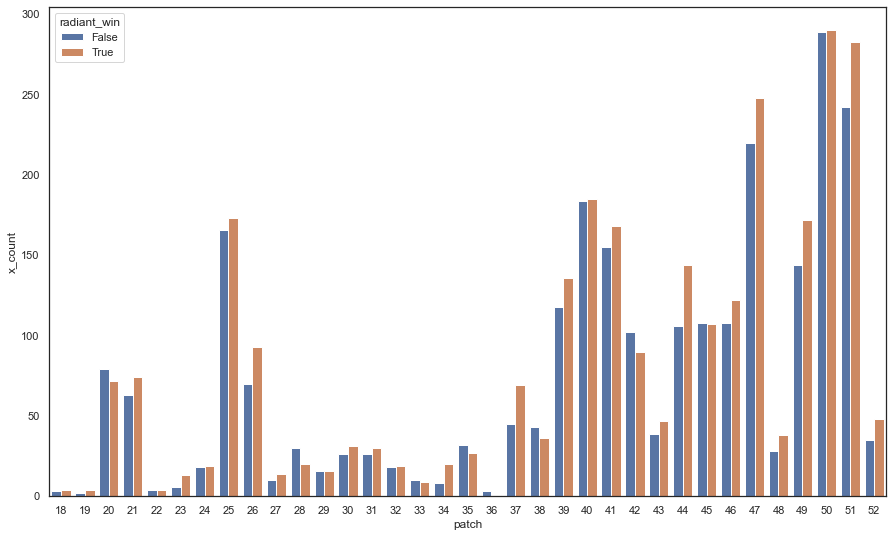

In [20]:
plt.figure(figsize=(15, 9))
sns.barplot(x='patch', y='x_count', hue='radiant_win', data=x)
# sns.barplot(x='patch', y='x_count', data=x, color='grey')

In [21]:
def win_condition(dfs):
    if (dfs['player_slot'] > 10) and (dfs['radiant_win'] == False):
        return True
    elif (dfs['player_slot'] < 10) and (dfs['radiant_win'] == True):
        return True
    else:
        return False

In [22]:
df_match['my_win'] = df_match.apply(win_condition, axis=1)

In [23]:
y = df_match.groupby(['patch','my_win']).size().to_frame('win_count').reset_index()

<AxesSubplot:xlabel='patch', ylabel='win_count'>

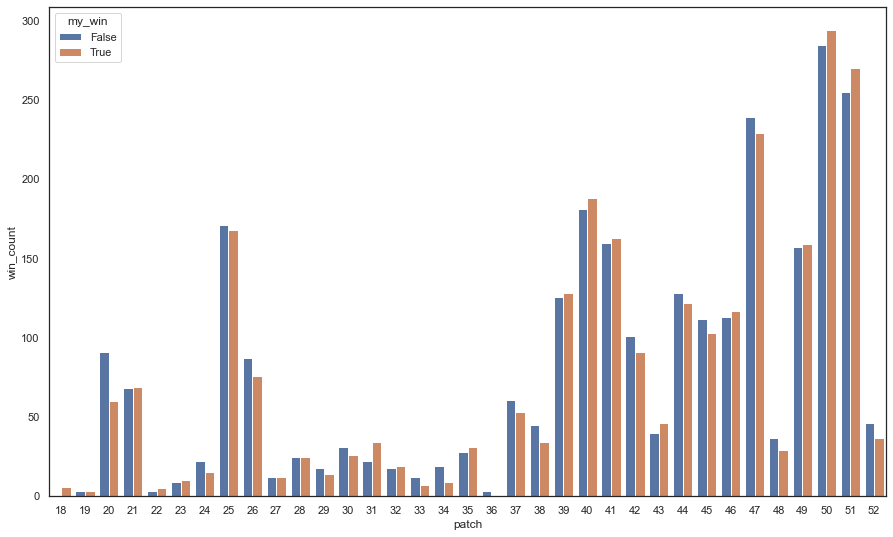

In [24]:
plt.figure(figsize=(15, 9))
sns.barplot(x='patch', y='win_count', hue='my_win', data=y)

In [25]:
y.head(10)

,patch,my_win,win_count
0,18,False,1
1,18,True,6
2,19,False,3
3,19,True,3
4,20,False,91
5,20,True,60
6,21,False,68
7,21,True,69
8,22,False,3
9,22,True,5


In [26]:
y['Total'] = y.groupby(['patch']).win_count.transform('sum')

In [27]:
y['win_rate'] = (y.win_count / y.Total * 100).astype('int')

In [28]:
y.head()

,patch,my_win,win_count,Total,win_rate
0,18,False,1,7,14
1,18,True,6,7,85
2,19,False,3,6,50
3,19,True,3,6,50
4,20,False,91,151,60


In [29]:
# y_sub = y[y.total > 20]
# win_frame = y_sub[y_sub.my_win == True].reset_index()
win_frame = y[y.my_win == True].reset_index()

In [30]:
win_frame = win_frame.drop(axis=1, labels='index', inplace=False)

In [31]:
win_frame

,patch,my_win,win_count,Total,win_rate
0,18,True,6,7,85
1,19,True,3,6,50
2,20,True,60,151,39
3,21,True,69,137,50
4,22,True,5,8,62
5,23,True,10,19,52
6,24,True,15,37,40
7,25,True,168,339,49
8,26,True,76,163,46
9,27,True,12,24,50


In [32]:
test = df_match.groupby(['patch','hero']).size().to_frame('count').reset_index()

In [33]:
hero_game_rate = df_match.groupby(['patch','hero','my_win']).size().to_frame('g_count').reset_index()

In [34]:
hero_game_rate

,patch,hero,my_win,g_count
0,18,Shadow Shaman,True,3
1,18,Sniper,True,1
2,18,Venomancer,False,1
3,18,Warlock,True,1
4,18,Zeus,True,1
5,19,Bloodseeker,False,3
6,19,Bloodseeker,True,3
7,20,Bloodseeker,False,49
8,20,Bloodseeker,True,37
9,20,Crystal Maiden,False,1


In [35]:
hero_game_rate['total'] = hero_game_rate.groupby(['patch', 'hero']).g_count.transform('sum')

In [36]:
hero_game_rate['hero_win_rate'] = (hero_game_rate.g_count / hero_game_rate.total * 100).astype('int')

In [37]:
hero_win_rate = hero_game_rate[hero_game_rate.my_win == True].reset_index()
hero_win_rate = hero_win_rate.drop(axis=1, labels='index', inplace=False)
hero_win_rate = hero_win_rate.drop('my_win', axis=1)
hero_win_rate.head()

,patch,hero,g_count,total,hero_win_rate
0,18,Shadow Shaman,3,3,100
1,18,Sniper,1,1,100
2,18,Warlock,1,1,100
3,18,Zeus,1,1,100
4,19,Bloodseeker,3,6,50


In [38]:
test.head()

,patch,hero,count
0,18,Shadow Shaman,3
1,18,Sniper,1
2,18,Venomancer,1
3,18,Warlock,1
4,18,Zeus,1


In [39]:
test_2 = test[test.groupby(['patch'])['count'].transform(max) == test['count']].reset_index().drop(axis=1, labels='index', inplace=False)

In [40]:
merge_df = pd.merge(win_frame, test_2, on=['patch','patch'])

In [41]:
merge_df.head()

,patch,my_win,win_count,Total,win_rate,hero,count
0,18,True,6,7,85,Shadow Shaman,3
1,19,True,3,6,50,Bloodseeker,6
2,20,True,60,151,39,Bloodseeker,86
3,21,True,69,137,50,Phantom Assassin,80
4,22,True,5,8,62,Phantom Assassin,4


In [42]:
hero_win_rate

,patch,hero,g_count,total,hero_win_rate
0,18,Shadow Shaman,3,3,100
1,18,Sniper,1,1,100
2,18,Warlock,1,1,100
3,18,Zeus,1,1,100
4,19,Bloodseeker,3,6,50
5,20,Bloodseeker,37,86,43
6,20,Crystal Maiden,1,2,50
7,20,Legion Commander,2,6,33
8,20,Monkey King,1,2,50
9,20,Phantom Assassin,8,13,61


In [43]:
tester = pd.merge(merge_df, hero_win_rate, left_on=['patch','hero'], right_on=['patch','hero'])

In [44]:
tester.head()

,patch,my_win,win_count,Total,win_rate,hero,count,g_count,total,hero_win_rate
0,18,True,6,7,85,Shadow Shaman,3,3,3,100
1,19,True,3,6,50,Bloodseeker,6,3,6,50
2,20,True,60,151,39,Bloodseeker,86,37,86,43
3,21,True,69,137,50,Phantom Assassin,80,39,80,48
4,22,True,5,8,62,Phantom Assassin,4,3,4,75


In [45]:
tester['percent_of_total'] = (tester['count'] / tester.Total * 100).astype('int')

In [46]:
tester.head()

,patch,my_win,win_count,Total,win_rate,hero,count,g_count,total,hero_win_rate,percent_of_total
0,18,True,6,7,85,Shadow Shaman,3,3,3,100,42
1,19,True,3,6,50,Bloodseeker,6,3,6,50,100
2,20,True,60,151,39,Bloodseeker,86,37,86,43,56
3,21,True,69,137,50,Phantom Assassin,80,39,80,48,58
4,22,True,5,8,62,Phantom Assassin,4,3,4,75,50


In [47]:
tester['test_label'] = tester.hero + ' ' +  tester['percent_of_total'].astype(str) + '%, Winrate ' + tester['hero_win_rate'].astype(str) + '%'

In [48]:
tester[tester.win_rate >= 50]

,patch,my_win,win_count,Total,win_rate,hero,count,g_count,total,hero_win_rate,percent_of_total,test_label
0,18,True,6,7,85,Shadow Shaman,3,3,3,100,42,"Shadow Shaman 42%, Winrate 100%"
1,19,True,3,6,50,Bloodseeker,6,3,6,50,100,"Bloodseeker 100%, Winrate 50%"
3,21,True,69,137,50,Phantom Assassin,80,39,80,48,58,"Phantom Assassin 58%, Winrate 48%"
4,22,True,5,8,62,Phantom Assassin,4,3,4,75,50,"Phantom Assassin 50%, Winrate 75%"
5,23,True,10,19,52,Phantom Assassin,9,5,9,55,47,"Phantom Assassin 47%, Winrate 55%"
9,27,True,12,24,50,Phantom Lancer,7,4,7,57,29,"Phantom Lancer 29%, Winrate 57%"
10,28,True,25,50,50,Juggernaut,13,6,13,46,26,"Juggernaut 26%, Winrate 46%"
13,31,True,34,56,60,Juggernaut,33,19,33,57,58,"Juggernaut 58%, Winrate 57%"
14,32,True,19,37,51,Juggernaut,28,14,28,50,75,"Juggernaut 75%, Winrate 50%"
17,35,True,31,59,52,Axe,17,8,17,47,28,"Axe 28%, Winrate 47%"


In [49]:
tester['label'] = tester.groupby(['patch'])['test_label'].transform(lambda x: ', '.join(x))
test_3 = tester[['label','patch']].drop_duplicates().reset_index().drop(axis=1, labels='index', inplace=False)

In [50]:
test_3.head()

,label,patch
0,"Shadow Shaman 42%, Winrate 100%",18
1,"Bloodseeker 100%, Winrate 50%",19
2,"Bloodseeker 56%, Winrate 43%",20
3,"Phantom Assassin 58%, Winrate 48%",21
4,"Phantom Assassin 50%, Winrate 75%",22


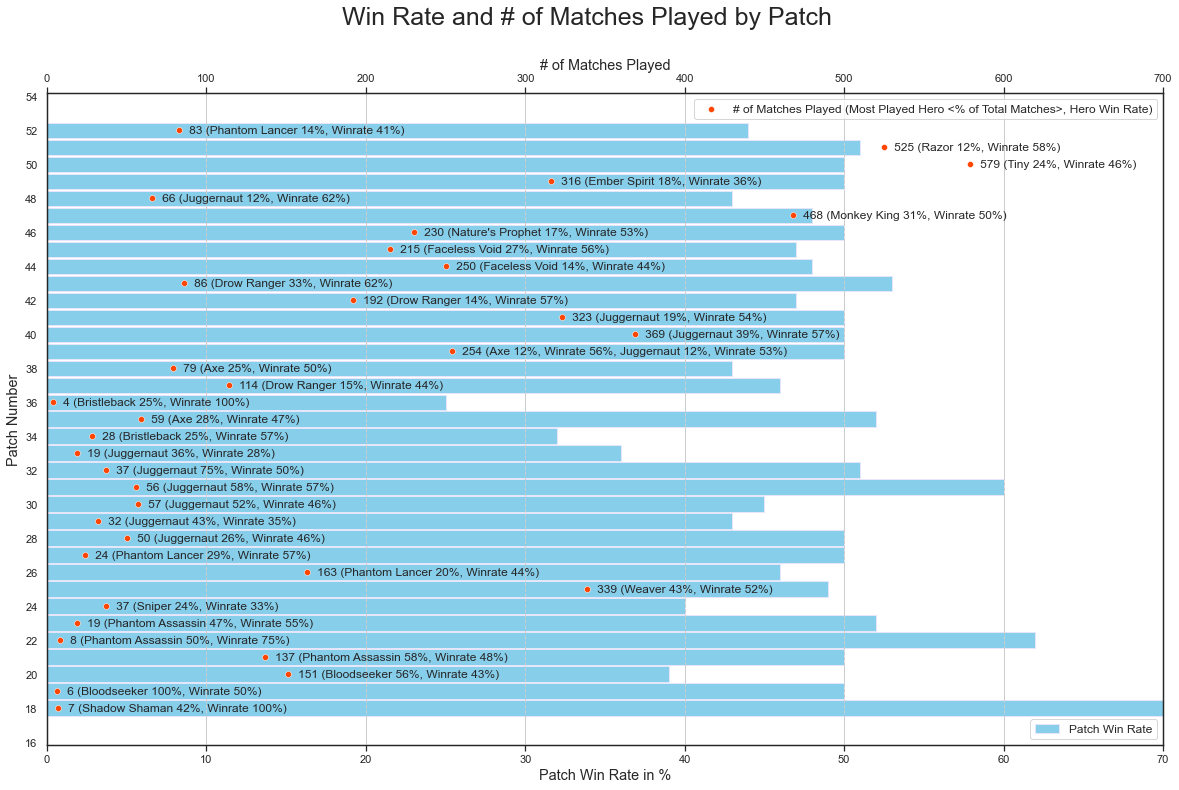

In [51]:
fig, ax1 = plt.subplots(figsize=(20, 12))
ax1.barh(y='patch', width='win_rate', data=win_frame, color='skyblue', edgecolor='lavender', height = 0.9)
ax2 = ax1.twiny()
ax2 = sns.scatterplot(x='Total', y='patch',  markers='x', data=win_frame, ax=ax2, color='orangered')
for a,b in test_3.label.items():
    ax2.annotate('   ' + str(win_frame.Total[a]) + ' (' + b + ')', (win_frame.Total[a], win_frame.patch[a]), rotation=0, ha='left', va='center')
ax1.grid(which='major', axis='x', linestyle='-')
ax2.grid(which='major', axis='x', linestyle='--')
ax1.set_xlim(0,70)
ax2.set_xlim(0,700)
loc = plticker.MultipleLocator(base=2.0)
ax1.yaxis.set_major_locator(loc)
fig.suptitle('Win Rate and # of Matches Played by Patch', fontsize=25)
ax1.set_xlabel('Patch Win Rate in %', fontsize='large')
ax2.set_xlabel('# of Matches Played', fontsize='large')
ax1.set_ylabel('Patch Number', fontsize='large')
ax2.legend(['# of Matches Played (Most Played Hero <% of Total Matches>, Hero Win Rate)'], fontsize='medium')
ax1.legend(['Patch Win Rate'], loc = "lower right", fontsize='medium')
fig.savefig('dota.png')
plt.show()

In [52]:
tester.win_count.sum()/tester.Total.sum()

0.49343506032647266

In [53]:
df_match.my_win

0       False
1       False
2       False
3       False
4       False
5        True
6        True
7        True
8       False
9        True
10      False
11       True
12      False
13       True
14      False
15      False
16       True
17       True
18      False
19       True
20       True
21      False
22      False
23      False
24      False
25       True
26      False
27       True
28       True
29       True
30       True
31      False
32      False
33       True
34       True
35      False
36      False
37      False
38      False
39      False
40       True
41      False
42      False
43       True
44       True
45       True
46      False
47      False
48      False
49      False
50       True
51       True
52       True
53      False
54       True
55       True
56      False
57       True
58       True
59       True
60      False
61      False
62      False
63       True
64      False
65       True
66       True
67       True
68      False
69      False
70       True
71    

In [54]:
# Radiant Win Rate
df_match[(df_match['player_slot'] < 10) & (df_match['my_win'] == True)].match_id.count() / df_match[(df_match['player_slot'] < 10)].match_id.count()
#  and (df_match['radiant_win'] == True)]

0.5179297597042514

In [55]:
# Radiant Games
df_match[(df_match['player_slot'] < 10)].match_id.count()

2705

In [56]:
# Dire Win Rate
df_match[(df_match['player_slot'] > 10) & (df_match['my_win'] == True)].match_id.count() / df_match[(df_match['player_slot'] > 10)].match_id.count()


0.4676877101232723

In [57]:
# Dire Games
df_match[(df_match['player_slot'] > 10)].match_id.count()

2677

In [58]:
# Juggernaut, Drow Ranger, Weaver, Monkey King win rate
df_match[(df_match['my_win'] == True) & (df_match['hero'] == 'Monkey King')].match_id.count() / df_match[(df_match['hero'] == 'Monkey King')].match_id.count()


0.4297872340425532

In [59]:
df_match[(df_match['hero'] == 'Monkey King')].match_id.count()

235

In [60]:
# Jug, DR, Weaver Radiant win rate
df_match[(df_match['player_slot'] < 10) & (df_match['my_win'] == True) & (df_match['hero'] == 'Monkey King')].match_id.count() / df_match[(df_match['player_slot'] < 10) & (df_match['hero'] == 'Monkey King')].match_id.count()


0.4322033898305085

In [61]:
df_match[(df_match['player_slot'] < 10) & (df_match['hero'] == 'Monkey King')].match_id.count()

118

In [62]:
# Jug, DR, Weaver Dire win rate
df_match[(df_match['player_slot'] > 10) & (df_match['my_win'] == True) & (df_match['hero'] == 'Monkey King')].match_id.count() / df_match[(df_match['player_slot'] > 10) & (df_match['hero'] == 'Monkey King')].match_id.count()


0.42735042735042733

In [63]:
df_match[(df_match['player_slot'] > 10) & (df_match['hero'] == 'Monkey King')].match_id.count()

117

In [64]:
df_hero_winrate = df_match.groupby(['hero', 'rad_dir', 'my_win']).size().to_frame('g_count').reset_index()

In [65]:
df_hero_winrate['total'] = df_hero_winrate.groupby(['hero', 'rad_dir']).g_count.transform('sum')

In [66]:
df_hero_winrate['hero_win_rate'] = (df_hero_winrate.g_count / df_hero_winrate.total * 100).astype('int')

In [67]:
df_hero_winrate

,hero,rad_dir,my_win,g_count,total,hero_win_rate
0,Abaddon,Dire,False,3,7,42
1,Abaddon,Dire,True,4,7,57
2,Abaddon,Radiant,False,7,9,77
3,Abaddon,Radiant,True,2,9,22
4,Anti-Mage,Dire,False,19,34,55
5,Anti-Mage,Dire,True,15,34,44
6,Anti-Mage,Radiant,False,22,31,70
7,Anti-Mage,Radiant,True,9,31,29
8,Arc Warden,Dire,False,2,2,100
9,Axe,Dire,False,49,76,64


In [68]:
df_hero_winrate_clean = df_hero_winrate[df_hero_winrate.my_win == True].reset_index().drop(axis=1, labels='index', inplace=False)

In [69]:
df_hero_winrate_clean = df_hero_winrate_clean.drop('my_win', axis=1)

# I only want heroes I have played at least 20 games on
df_hero_winrate_clean = df_hero_winrate_clean[df_hero_winrate_clean.total > 20].reset_index().drop(axis=1, labels='index', inplace=False)
df_hero_winrate_clean = df_hero_winrate_clean[df_hero_winrate_clean.duplicated('hero',keep=False)].reset_index().drop(axis=1, labels='index', inplace=False)
df_hero_winrate_clean.head()

,hero,rad_dir,g_count,total,hero_win_rate
0,Anti-Mage,Dire,15,34,44
1,Anti-Mage,Radiant,9,31,29
2,Axe,Dire,27,76,35
3,Axe,Radiant,52,76,68
4,Bloodseeker,Dire,29,64,45


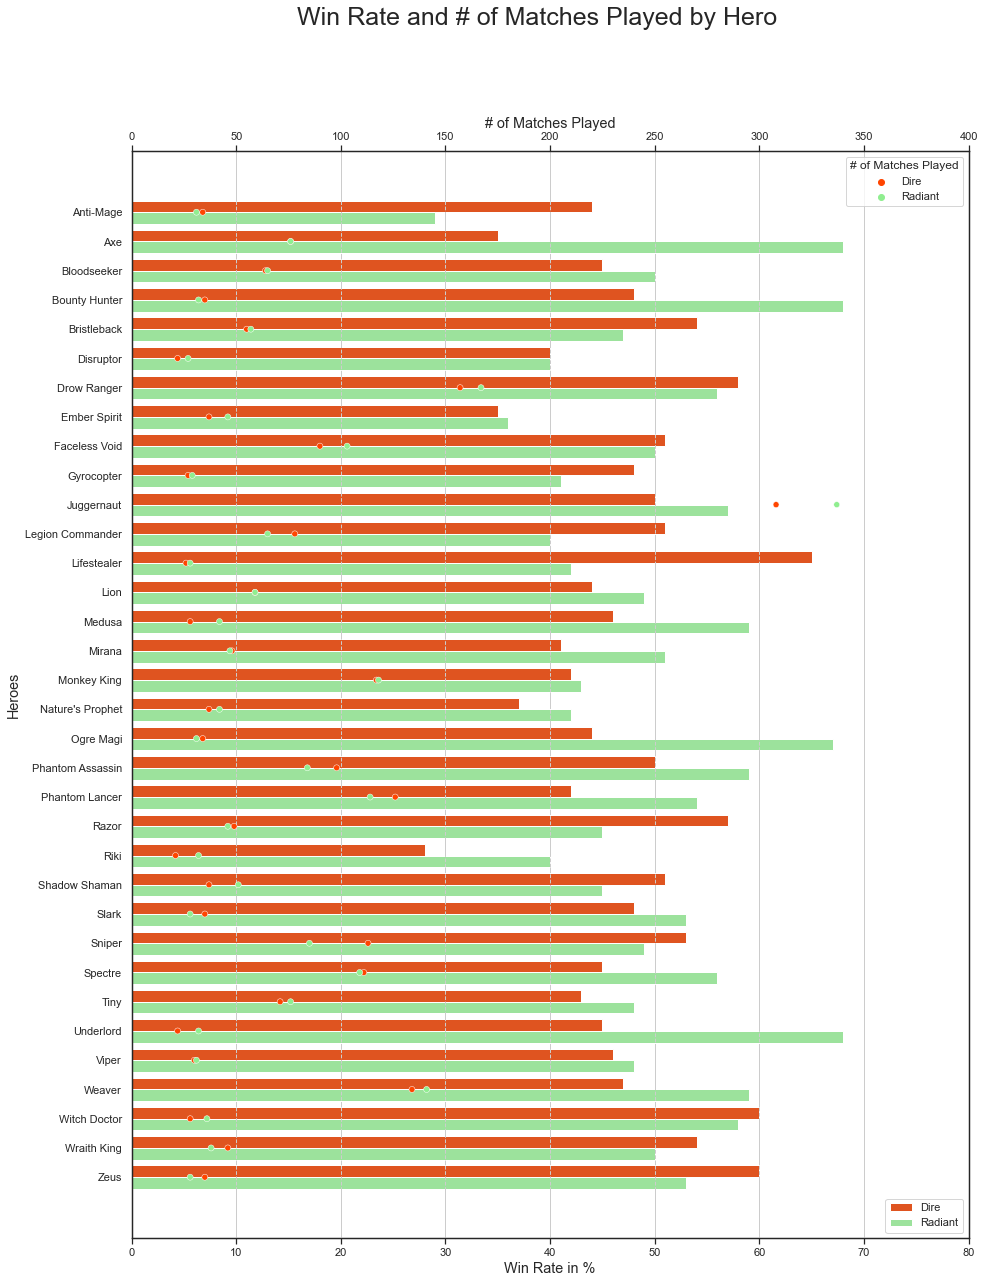

In [70]:
fig, ax1 = plt.subplots(figsize=(15, 20))
ax1 = sns.barplot(data=df_hero_winrate_clean, x='hero_win_rate', y='hero', hue='rad_dir', orient='h', palette = [ 'orangered','lightgreen'])
ax1.legend_.set_title('Hero Win Rate')
ax1.legend(loc = "lower right")
ax2 = ax1.twiny()
ax2 = sns.scatterplot(x='total', y='hero',  markers=True, data=df_hero_winrate_clean, ax=ax2, hue='rad_dir', palette = [ 'orangered','lightgreen'], legend=True)
ax2.legend(loc = "upper right")
ax2.legend_.set_title('# of Matches Played')
ax1.grid(which='major', axis='x', linestyle='-')
ax2.grid(which='major', axis='x', linestyle='--')
ax1.set_xlim(0,80)
ax2.set_xlim(0,400)
fig.suptitle('Win Rate and # of Matches Played by Hero', fontsize=25)
ax1.set_xlabel('Win Rate in %', fontsize='large')
ax2.set_xlabel('# of Matches Played', fontsize='large')
ax1.set_ylabel('Heroes', fontsize='large')
# fig.savefig('dota.png')
plt.show()

In [71]:
df_match.hero.value_counts()

Juggernaut             645
Drow Ranger            324
Weaver                 275
Phantom Lancer         240
Monkey King            235
Spectre                220
Sniper                 198
Faceless Void          193
Phantom Assassin       182
Axe                    152
Tiny                   147
Legion Commander       143
Bloodseeker            129
Lion                   118
Bristleback            112
Razor                   95
Mirana                  95
Shadow Shaman           88
Wraith King             84
Ember Spirit            83
Nature's Prophet        79
Medusa                  70
Bounty Hunter           67
Anti-Mage               65
Ogre Magi               65
Witch Doctor            64
Zeus                    63
Slark                   63
Viper                   61
Gyrocopter              56
Lifestealer             54
Underlord               54
Riki                    53
Disruptor               49
Earthshaker             46
Dazzle                  41
Storm Spirit            41
H

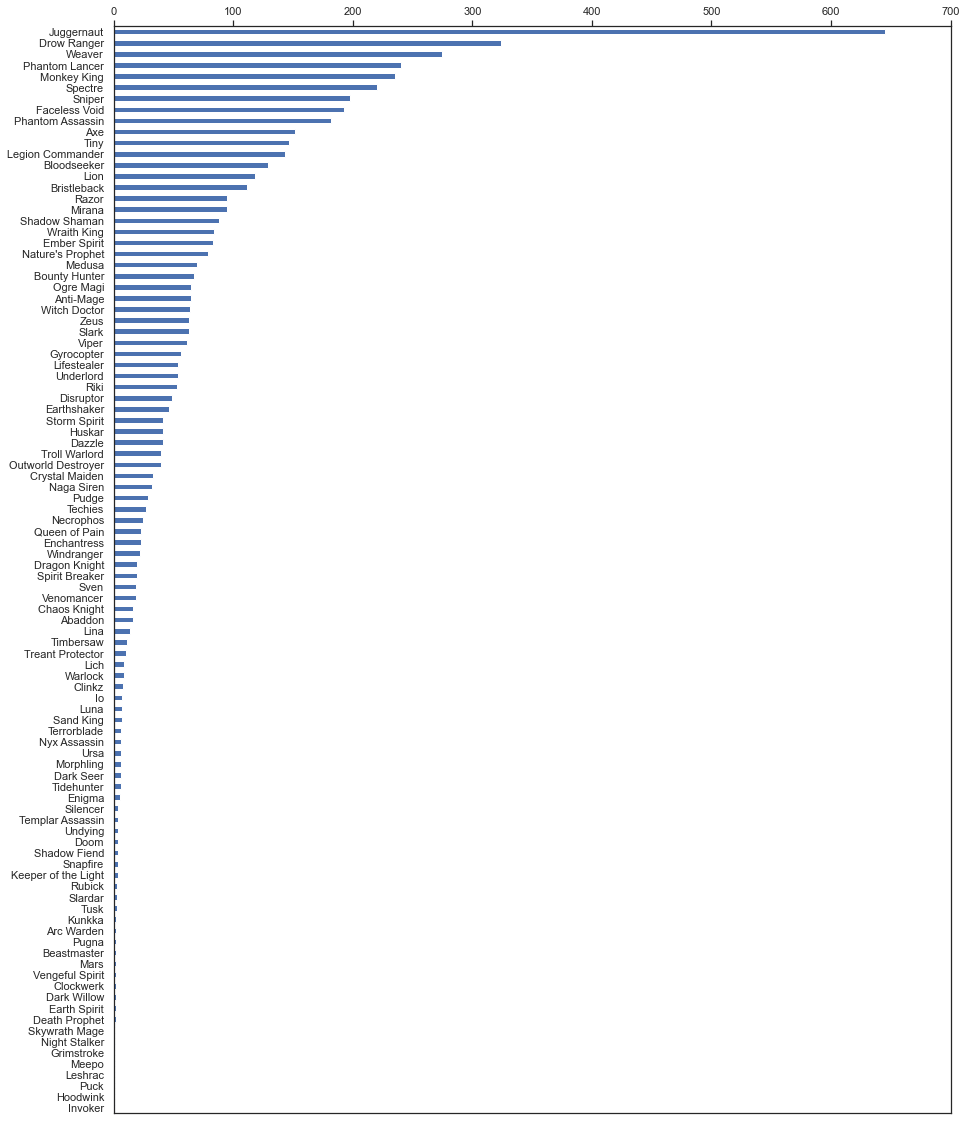

In [72]:
fig, ax1 = plt.subplots(figsize=(15, 20))
df_match.hero.value_counts().sort_values().plot(kind='barh')
ax1.set_xlim(0,700)
ax1.axes.xaxis.set_ticks_position("top")
fig.savefig('dota_heroes.png')

In [73]:
df_match.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp,player_slot,hero,rad_dir,my_win
0,7150274721,3,63,None,117,None,9,NaN,None,1621,1,0,22,10,0,7,6008075266,0,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",0,None,39,NaN,True,None,NaN,1683851172,None,6,2047,NaN,117284662.00,0.00,0.00,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150274721_1172...,NaN,NaN,NaN,NaN,NaN,NaN,130,Medusa,Dire,False
1,7150256183,51,63,None,117,None,15,NaN,None,1764,1,17,22,10,0,7,6008059611,0,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",0,None,43,NaN,True,None,NaN,1683848869,None,388,1975,NaN,1097375154.00,0.00,0.00,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150256183_1097...,NaN,NaN,NaN,NaN,NaN,NaN,129,Phantom Lancer,Dire,False
2,7150214339,3,63,None,117,None,42,NaN,None,3274,1,24,22,10,0,7,6008033249,0,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",0,None,43,NaN,True,None,NaN,1683844129,None,4,1572,NaN,444030929.00,0.00,0.00,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150214339_4440...,NaN,NaN,NaN,NaN,NaN,NaN,129,Spectre,Dire,False
3,7150179312,63,0,None,117,None,38,NaN,None,1739,1,138,22,10,0,7,6007986536,0,None,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",0,None,10,NaN,False,None,NaN,1683840942,None,1983,0,NaN,1818626807.00,0.00,0.00,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150179312_1818...,NaN,NaN,NaN,NaN,NaN,NaN,0,Techies,Radiant,False
4,7148918745,3,15,None,117,None,68,NaN,None,3743,1,65,22,10,0,7,6006884540,0,None,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",0,None,80,NaN,True,None,NaN,1683771256,None,6,32,NaN,1528230685.00,0.00,0.00,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7148918745_1528...,NaN,NaN,NaN,NaN,NaN,NaN,129,Spectre,Dire,False


In [74]:
# df.groupby('param')['group'].nunique()
df_match.groupby(['patch'])['hero'].nunique().to_frame('unique_hero_count').reset_index()

,patch,unique_hero_count
0,18,5
1,19,1
2,20,12
3,21,10
4,22,4
5,23,5
6,24,12
7,25,31
8,26,31
9,27,9


In [75]:
# df_heroes.head(2)

In [76]:
df.average_rank.value_counts().sort_index()

13.00      3
14.00     22
15.00     15
18.00      2
19.00      2
20.00      7
21.00    104
22.00    138
23.00    102
24.00    107
25.00     43
31.00    112
32.00     23
33.00     22
34.00     24
35.00      5
41.00      3
42.00      5
43.00      1
44.00      4
45.00      1
51.00      2
Name: average_rank, dtype: int64

In [77]:
df_match.all_word_counts.value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [78]:
df_match.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp,player_slot,hero,rad_dir,my_win
0,7150274721,3,63,None,117,None,9,NaN,None,1621,1,0,22,10,0,7,6008075266,0,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",0,None,39,NaN,True,None,NaN,1683851172,None,6,2047,NaN,117284662.00,0.00,0.00,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150274721_1172...,NaN,NaN,NaN,NaN,NaN,NaN,130,Medusa,Dire,False
1,7150256183,51,63,None,117,None,15,NaN,None,1764,1,17,22,10,0,7,6008059611,0,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",0,None,43,NaN,True,None,NaN,1683848869,None,388,1975,NaN,1097375154.00,0.00,0.00,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150256183_1097...,NaN,NaN,NaN,NaN,NaN,NaN,129,Phantom Lancer,Dire,False
2,7150214339,3,63,None,117,None,42,NaN,None,3274,1,24,22,10,0,7,6008033249,0,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",0,None,43,NaN,True,None,NaN,1683844129,None,4,1572,NaN,444030929.00,0.00,0.00,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150214339_4440...,NaN,NaN,NaN,NaN,NaN,NaN,129,Spectre,Dire,False
3,7150179312,63,0,None,117,None,38,NaN,None,1739,1,138,22,10,0,7,6007986536,0,None,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",0,None,10,NaN,False,None,NaN,1683840942,None,1983,0,NaN,1818626807.00,0.00,0.00,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150179312_1818...,NaN,NaN,NaN,NaN,NaN,NaN,0,Techies,Radiant,False
4,7148918745,3,15,None,117,None,68,NaN,None,3743,1,65,22,10,0,7,6006884540,0,None,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",0,None,80,NaN,True,None,NaN,1683771256,None,6,32,NaN,1528230685.00,0.00,0.00,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7148918745_1528...,NaN,NaN,NaN,NaN,NaN,NaN,129,Spectre,Dire,False


In [190]:
df_match.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp,player_slot,hero,rad_dir,my_win
0,7150274721,3,63,None,117,None,9,NaN,None,1621,1,0,22,10,0,7,6008075266,0,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",0,None,39,NaN,True,None,NaN,1683851172,None,6,2047,NaN,117284662.00,0.00,0.00,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150274721_1172...,NaN,NaN,NaN,NaN,NaN,NaN,130,Medusa,Dire,False
1,7150256183,51,63,None,117,None,15,NaN,None,1764,1,17,22,10,0,7,6008059611,0,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",0,None,43,NaN,True,None,NaN,1683848869,None,388,1975,NaN,1097375154.00,0.00,0.00,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150256183_1097...,NaN,NaN,NaN,NaN,NaN,NaN,129,Phantom Lancer,Dire,False
2,7150214339,3,63,None,117,None,42,NaN,None,3274,1,24,22,10,0,7,6008033249,0,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",0,None,43,NaN,True,None,NaN,1683844129,None,4,1572,NaN,444030929.00,0.00,0.00,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150214339_4440...,NaN,NaN,NaN,NaN,NaN,NaN,129,Spectre,Dire,False
3,7150179312,63,0,None,117,None,38,NaN,None,1739,1,138,22,10,0,7,6007986536,0,None,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",0,None,10,NaN,False,None,NaN,1683840942,None,1983,0,NaN,1818626807.00,0.00,0.00,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150179312_1818...,NaN,NaN,NaN,NaN,NaN,NaN,0,Techies,Radiant,False
4,7148918745,3,15,None,117,None,68,NaN,None,3743,1,65,22,10,0,7,6006884540,0,None,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",0,None,80,NaN,True,None,NaN,1683771256,None,6,32,NaN,1528230685.00,0.00,0.00,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7148918745_1528...,NaN,NaN,NaN,NaN,NaN,NaN,129,Spectre,Dire,False


In [196]:
# temps = df_match.copy()
df_match['stats_dict'] =""

In [197]:
for index, row in df_match.iterrows():
    player_slot = row['player_slot']
    for dict_item in row['players']:
        if dict_item['player_slot'] == player_slot:
            df_match.at[index, 'stats_dict'] = dict_item

In [200]:
df_match.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp,player_slot,hero,rad_dir,my_win,stats_dict
0,7150274721,3,63,None,117,None,9,NaN,None,1621,1,0,22,10,0,7,6008075266,0,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",0,None,39,NaN,True,None,NaN,1683851172,None,6,2047,NaN,117284662.00,0.00,0.00,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150274721_1172...,NaN,NaN,NaN,NaN,NaN,NaN,130,Medusa,Dire,False,"{'match_id': 7150274721, 'player_slot': 130, '..."
1,7150256183,51,63,None,117,None,15,NaN,None,1764,1,17,22,10,0,7,6008059611,0,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",0,None,43,NaN,True,None,NaN,1683848869,None,388,1975,NaN,1097375154.00,0.00,0.00,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150256183_1097...,NaN,NaN,NaN,NaN,NaN,NaN,129,Phantom Lancer,Dire,False,"{'match_id': 7150256183, 'player_slot': 129, '..."
2,7150214339,3,63,None,117,None,42,NaN,None,3274,1,24,22,10,0,7,6008033249,0,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",0,None,43,NaN,True,None,NaN,1683844129,None,4,1572,NaN,444030929.00,0.00,0.00,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150214339_4440...,NaN,NaN,NaN,NaN,NaN,NaN,129,Spectre,Dire,False,"{'match_id': 7150214339, 'player_slot': 129, '..."
3,7150179312,63,0,None,117,None,38,NaN,None,1739,1,138,22,10,0,7,6007986536,0,None,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",0,None,10,NaN,False,None,NaN,1683840942,None,1983,0,NaN,1818626807.00,0.00,0.00,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150179312_1818...,NaN,NaN,NaN,NaN,NaN,NaN,0,Techies,Radiant,False,"{'match_id': 7150179312, 'player_slot': 0, 'ab..."
4,7148918745,3,15,None,117,None,68,NaN,None,3743,1,65,22,10,0,7,6006884540,0,None,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",0,None,80,NaN,True,None,NaN,1683771256,None,6,32,NaN,1528230685.00,0.00,0.00,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7148918745_1528...,NaN,NaN,NaN,NaN,NaN,NaN,129,Spectre,Dire,False,"{'match_id': 7148918745, 'player_slot': 129, '..."


In [201]:
temps = df_match.copy()

In [202]:
# Too large to unpack
# pd.concat([temps.drop(['stats_dict'], axis=1), temps['stats_dict'].apply(pd.Series)], axis=1)

In [203]:
temps.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp,player_slot,hero,rad_dir,my_win,stats_dict
0,7150274721,3,63,None,117,None,9,NaN,None,1621,1,0,22,10,0,7,6008075266,0,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",0,None,39,NaN,True,None,NaN,1683851172,None,6,2047,NaN,117284662.00,0.00,0.00,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150274721_1172...,NaN,NaN,NaN,NaN,NaN,NaN,130,Medusa,Dire,False,"{'match_id': 7150274721, 'player_slot': 130, '..."
1,7150256183,51,63,None,117,None,15,NaN,None,1764,1,17,22,10,0,7,6008059611,0,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",0,None,43,NaN,True,None,NaN,1683848869,None,388,1975,NaN,1097375154.00,0.00,0.00,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150256183_1097...,NaN,NaN,NaN,NaN,NaN,NaN,129,Phantom Lancer,Dire,False,"{'match_id': 7150256183, 'player_slot': 129, '..."
2,7150214339,3,63,None,117,None,42,NaN,None,3274,1,24,22,10,0,7,6008033249,0,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",0,None,43,NaN,True,None,NaN,1683844129,None,4,1572,NaN,444030929.00,0.00,0.00,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150214339_4440...,NaN,NaN,NaN,NaN,NaN,NaN,129,Spectre,Dire,False,"{'match_id': 7150214339, 'player_slot': 129, '..."
3,7150179312,63,0,None,117,None,38,NaN,None,1739,1,138,22,10,0,7,6007986536,0,None,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",0,None,10,NaN,False,None,NaN,1683840942,None,1983,0,NaN,1818626807.00,0.00,0.00,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150179312_1818...,NaN,NaN,NaN,NaN,NaN,NaN,0,Techies,Radiant,False,"{'match_id': 7150179312, 'player_slot': 0, 'ab..."
4,7148918745,3,15,None,117,None,68,NaN,None,3743,1,65,22,10,0,7,6006884540,0,None,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",0,None,80,NaN,True,None,NaN,1683771256,None,6,32,NaN,1528230685.00,0.00,0.00,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7148918745_1528...,NaN,NaN,NaN,NaN,NaN,NaN,129,Spectre,Dire,False,"{'match_id': 7148918745, 'player_slot': 129, '..."


In [204]:
stat = pd.DataFrame(temps.stats_dict.values.tolist())

In [205]:
stat.head()

,match_id,player_slot,ability_targets,ability_upgrades_arr,ability_uses,account_id,actions,additional_units,assists,backpack_0,backpack_1,backpack_2,backpack_3,buyback_log,camps_stacked,connection_log,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,dn_t,firstblood_claimed,gold,gold_per_min,gold_reasons,gold_spent,gold_t,hero_damage,hero_healing,hero_hits,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_uses,kill_streaks,killed,killed_by,kills,kills_log,lane_pos,last_hits,leaver_status,level,lh_t,life_state,max_hero_hit,multi_kills,net_worth,obs,obs_left_log,obs_log,obs_placed,party_id,party_size,performance_others,permanent_buffs,pings,pred_vict,purchase,purchase_log,randomed,repicked,roshans_killed,rune_pickups,runes,runes_log,sen,sen_left_log,sen_log,sen_placed,stuns,teamfight_participation,times,tower_damage,towers_killed,xp_per_min,xp_reasons,xp_t,personaname,name,last_login,radiant_win,start_time,duration,cluster,lobby_type,game_mode,is_contributor,patch,region,isRadiant,win,lose,total_gold,total_xp,kills_per_min,kda,abandons,rank_tier,is_subscriber,cosmetics,benchmarks,neutral_kills,tower_kills,courier_kills,lane_kills,hero_kills,observer_kills,sentry_kills,roshan_kills,necronomicon_kills,ancient_kills,buyback_count,observer_uses,sentry_uses,lane_efficiency,lane_efficiency_pct,lane,lane_role,is_roaming,purchase_time,first_purchase_time,item_win,item_usage,purchase_tpscroll,actions_per_min,life_state_dead,purchase_ward_observer,purchase_ward_sentry,purchase_gem
0,7150274721,130,None,"[5505, 5504, 5505, 5506, 5504, 5507, 5505, 550...",None,190040093,None,None,1,0,0,0,NaN,None,NaN,None,NaN,None,None,None,None,None,3,4,None,NaN,1094.00,372,None,9175.00,None,12985.00,0.00,None,94,88,236,36,63,0,147,288.00,None,None,None,None,1,None,None,209,0,14,None,None,None,None,9869.00,None,None,None,NaN,7.00,1.00,None,[],NaN,None,None,None,None,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,None,0.00,NaN,413,None,None,a_fat,None,None,True,1683851172,1621,117,7,22,False,52,1,False,0,1,10050,11157,0.04,0,0,34,False,[],"{'gold_per_min': {'raw': 372, 'pct': 0.1492537...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7150256183,129,None,"[5065, 5068, 5066, 5068, 5065, 5067, 5068, 506...",None,190040093,None,None,5,0,0,0,NaN,None,NaN,None,NaN,None,None,None,None,None,5,7,None,NaN,513.00,393,None,11085.00,None,9828.00,0.00,None,12,174,75,63,61,36,147,331.00,None,None,None,None,1,None,None,168,0,16,None,None,None,None,10968.00,None,None,None,NaN,6.00,1.00,None,[],NaN,None,None,None,None,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,None,13.00,NaN,493,None,None,a_fat,None,None,True,1683848869,1764,117,7,22,False,52,1,False,0,1,11554,14494,0.03,1,0,34,False,[],"{'gold_per_min': {'raw': 393, 'pct': 0.0476190...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7150214339,129,None,"[5334, 5336, 5334, 5336, 5335, 5337, 5334, 533...",None,190040093,None,None,10,0,0,4204,NaN,None,NaN,None,NaN,None,None,None,None,None,4,9,None,NaN,353.00,593,None,30445.00,None,56927.00,0.00,None,67,137,208,40,160,63,147,362.00,None,None,None,None,15,None,None,396,0,27,None,None,None,None,29983.00,None,None,None,NaN,6.00,1.00,None,"[{'permanent_buff': 2, 'stack_count': 0, 'gran...",NaN,None,None,None,None,None,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,None,2304.00,NaN,810,None,None,a_fat,None,None,True,1683844129,3274,117,7,22,False,52,1,False,0,1,32358,44199,0.27,5,0,34,False,[],"{'gold_per_min': {'raw': 593, 'pct': 0.6666666...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7150179312,0,None,"[879, 5601, 879, 5601, 879, 5599, 886, 879, 56...",None,190040093,None,None,2,0,0,0,NaN,None,NaN,None,NaN,None,None,None,None,None,9,2,None,NaN,2669.00,205,None,3575.00,None,7897.00,0.00,None,105,

In [206]:
stat.shape

(5382, 139)

In [210]:
cols_to_use = stat.columns.difference(temps.columns)

In [232]:
data = temps.merge(stat[cols_to_use], left_index=True, right_index=True, how='outer')


In [233]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp,player_slot,hero,rad_dir,my_win,stats_dict,abandons,ability_targets,ability_upgrades_arr,ability_uses,account_id,actions,actions_per_min,additional_units,ancient_kills,assists,backpack_0,backpack_1,backpack_2,backpack_3,benchmarks,buyback_count,buyback_log,camps_stacked,connection_log,courier_kills,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,dn_t,first_purchase_time,firstblood_claimed,gold,gold_per_min,gold_reasons,gold_spent,gold_t,hero_damage,hero_healing,hero_hits,hero_id,hero_kills,isRadiant,is_contributor,is_roaming,is_subscriber,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_usage,item_uses,item_win,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane,lane_efficiency,lane_efficiency_pct,lane_kills,lane_pos,lane_role,last_hits,last_login,leaver_status,level,lh_t,life_state,life_state_dead,lose,max_hero_hit,multi_kills,name,necronomicon_kills,net_worth,neutral_kills,obs,obs_left_log,obs_log,obs_placed,observer_kills,observer_uses,party_id,party_size,performance_others,permanent_buffs,personaname,pings,pred_vict,purchase,purchase_gem,purchase_log,purchase_time,purchase_tpscroll,purchase_ward_observer,purchase_ward_sentry,randomed,rank_tier,repicked,roshan_kills,roshans_killed,rune_pickups,runes,runes_log,sen,sen_left_log,sen_log,sen_placed,sentry_kills,sentry_uses,stuns,teamfight_participation,times,total_gold,total_xp,tower_damage,tower_kills,towers_killed,win,xp_per_min,xp_reasons,xp_t
0,7150274721,3,63,None,117,None,9,NaN,None,1621,1,0,22,10,0,7,6008075266,0,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",0,None,39,NaN,True,None,NaN,1683851172,None,6,2047,NaN,117284662.00,0.00,0.00,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150274721_1172...,NaN,NaN,NaN,NaN,NaN,NaN,130,Medusa,Dire,False,"{'match_id': 7150274721, 'player_slot': 130, '...",0,None,"[5505, 5504, 5505, 5506, 5504, 5507, 5505, 550...",None,190040093,None,NaN,None,NaN,1,0,0,0,NaN,"{'gold_per_min': {'raw': 372, 'pct': 0.1492537...",NaN,None,NaN,None,NaN,NaN,None,None,None,None,None,3,4,None,NaN,NaN,1094.00,372,None,9175.00,None,12985.00,0.00,None,94,NaN,False,False,NaN,False,88,236,36,63,0,147,288.00,NaN,None,NaN,0,None,None,None,1,None,0.04,NaN,NaN,NaN,NaN,None,NaN,209,None,0,14,None,None,NaN,1,None,None,None,NaN,9869.00,NaN,None,None,None,NaN,NaN,NaN,7.00,1.00,None,[],a_fat,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None,34,None,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,10050,11157,0.00,NaN,NaN,0,413,None,None
1,7150256183,51,63,None,117,None,15,NaN,None,1764,1,17,22,10,0,7,6008059611,0,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",0,None,43,NaN,True,None,NaN,1683848869,None,388,1975,NaN,1097375154.00,0.00,0.00,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150256183_1097...,NaN,NaN,NaN,NaN,NaN,NaN,129,Phantom Lancer,Dire,False,"{'match_id': 7150256183, 'player_slot': 129, '...",0,None,"[5065, 5068, 5066, 5068, 5065, 5067, 5068, 506...",None,190040093,None,NaN,None,NaN,5,0,0,0,NaN,"{'gold_per_min': {'raw': 393, 'pct': 0.0476190...",NaN,None,NaN,None,NaN,NaN,None,None,None,None,None,5,7,None,NaN,NaN,513.00,393,None,11085.00,None,9828.00,0.00,None,12,NaN,False,False,NaN,False,174,75,63,61,36,147,331.00,NaN,None,NaN,1,None,None,None,1,None,0.03,NaN,NaN,NaN,NaN,None,NaN,168,None,0,16,None,None,NaN,1,None,None,None,NaN,10968.00,NaN,

In [234]:
df.head()

,match_id,player_slot,radiant_win,duration,game_mode,lobby_type,hero_id,start_time,version,kills,deaths,assists,skill,average_rank,leaver_status,party_size,hero
0,7150274721,130,True,1621,22,7,94,1683851172,NaN,1,3,1,NaN,33.00,0,1.00,Medusa
1,7150256183,129,True,1764,22,7,12,1683848869,NaN,1,5,5,NaN,34.00,0,1.00,Phantom Lancer
2,7150214339,129,True,3274,22,7,67,1683844129,NaN,15,4,10,NaN,35.00,0,1.00,Spectre
3,7150179312,0,False,1739,22,7,105,1683840942,NaN,2,9,2,NaN,34.00,0,1.00,Techies
4,7148918745,129,True,3743,22,7,67,1683771256,NaN,11,11,27,NaN,34.00,0,1.00,Spectre


In [235]:
df.shape

(5382, 17)

In [236]:
data.shape

(5382, 178)

In [237]:
cols_to_use_hero_merge = df.columns.difference(data.columns)

In [238]:
data = data.merge(df[cols_to_use_hero_merge], left_index=True, right_index=True, how='outer')

In [241]:
data = pd.merge(data,df_heroes,on=['hero_id'],how='left')

In [242]:
data.to_pickle('data.pkl')

In [6]:
df_heroes.head()

,id,name,localized_name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,hero_id,turbo_picks,turbo_wins,pro_ban,pro_win,pro_pick,1_pick,1_win,2_pick,2_win,3_pick,3_win,4_pick,4_win,5_pick,5_win,6_pick,6_win,7_pick,7_win,8_pick,8_win,null_pick,null_win
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",/apps/dota2/images/dota_react/heroes/antimage....,/apps/dota2/images/dota_react/heroes/icons/ant...,120,0.75,75,0.00,0.00,25,29,33,19,24,12,1.60,2.80,1.80,150,0,1.40,100,0.30,310,NaN,True,2,1800,800,1,245924,129043,730,97,218,11549,6066,42766,22312,65407,33319,57870,29412,33131,16612,15342,7627,7842,3866,2858,1374,2213987,0
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Carry]",/apps/dota2/images/dota_react/heroes/axe.png?,/apps/dota2/images/dota_react/heroes/icons/axe...,120,2.50,75,0.00,-1.00,25,30,34,25,20,18,2.80,2.00,1.60,150,900,1.70,100,0.40,315,NaN,True,2,1800,800,2,276200,153677,185,71,147,11939,6660,46682,25857,74178,40525,63873,34345,34685,18624,14968,7906,7212,3749,2303,1176,2488284,0
2,3,npc_dota_hero_bane,Bane,all,Ranged,"[Support, Disabler, Nuker, Durable]",/apps/dota2/images/dota_react/heroes/bane.png?,/apps/dota2/images/dota_react/heroes/icons/ban...,120,0.25,75,0.00,1.00,25,4,10,23,23,23,2.50,2.50,2.50,400,900,1.70,100,0.30,305,NaN,True,4,1800,1200,3,52622,24316,37,13,33,1420,651,5106,2445,8333,4014,8171,4075,5176,2554,2513,1303,1422,697,575,283,393687,0
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Nuker, Initiator]",/apps/dota2/images/dota_react/heroes/bloodseek...,/apps/dota2/images/dota_react/heroes/icons/blo...,120,0.25,75,0.00,2.00,25,35,41,24,22,17,2.70,3.10,2.00,150,900,1.70,100,0.43,300,NaN,True,2,1800,800,4,168333,85332,633,79,173,5369,2701,16908,8499,25834,13391,22936,11983,13525,7102,6151,3189,3259,1692,1412,741,873204,0
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker]",/apps/dota2/images/dota_react/heroes/crystal_m...,/apps/dota2/images/dota_react/heroes/icons/cry...,120,0.25,75,1.00,-1.00,25,30,36,17,16,16,2.20,1.60,3.30,600,900,1.70,100,0.45,280,NaN,True,2,1800,800,5,302747,158894,197,356,695,11603,6127,41915,22084,64185,33621,57145,29655,32106,16579,14831,7638,7836,4082,3279,1689,2807695,0


In [4]:
df_heroes.turn_rate.isna().sum()

83

In [9]:
df_heroes[['localized_name', 'turn_rate']]

,localized_name,turn_rate
0,Anti-Mage,NaN
1,Axe,NaN
2,Bane,NaN
3,Bloodseeker,NaN
4,Crystal Maiden,NaN
5,Drow Ranger,0.70
6,Earthshaker,0.90
7,Juggernaut,NaN
8,Mirana,NaN
9,Morphling,0.70
